In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import mean_squared_error

In [8]:
file_path = r"C:\Users\vatch\Downloads\archive (41)\TemperatureData.csv"
df = pd.read_csv(r"C:\Users\vatch\Downloads\archive (41)\TemperatureData.csv")

In [9]:
df.head()

,Year,Month,Day,TemperatureF
0,2015,January,1,23
1,2015,January,2,31
2,2015,January,3,25
3,2015,January,4,39
4,2015,January,5,29


In [11]:
print(df.columns)

Index(['Year', 'Month', 'Day', 'TemperatureF'], dtype='object')


In [12]:
temp_column = 'TemperatureF'

if temp_column not in df.columns:
    raise ValueError(f"Column '{temp_column}' not found. Available columns: {df.columns.tolist()}")
data = df[temp_column].values.reshape(-1, 1)

In [13]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

In [14]:
print(data_scaled)

[[-1.28474876]
 [-0.84287809]
 [-1.1742811 ]
 [-0.40100741]
 [-0.95334576]
 [-1.89232094]
 [-2.00278861]
 [-2.33419162]
 [-1.45045027]
 [-1.67138561]
 [-1.5056841 ]
 [-0.84287809]
 [-1.45045027]
 [-1.72661944]
 [-1.28474876]
 [-1.3399826 ]
 [-1.94755478]
 [-0.84287809]
 [-0.67717659]
 [-1.00857959]
 [-1.28474876]
 [-1.00857959]
 [-1.11904726]
 [-1.00857959]
 [-1.22951493]
 [-1.72661944]
 [-1.89232094]
 [-1.78185327]
 [-1.67138561]
 [-1.3399826 ]
 [-1.94755478]
 [-1.67138561]
 [-1.67138561]
 [-2.05802245]
 [-1.39521643]
 [-1.61615177]
 [-2.11325628]
 [-1.56091794]
 [-1.67138561]
 [-1.72661944]
 [-1.61615177]
 [-1.72661944]
 [-1.56091794]
 [-2.00278861]
 [-1.89232094]
 [-2.33419162]
 [-2.38942545]
 [-1.89232094]
 [-1.56091794]
 [-1.72661944]
 [-2.11325628]
 [-1.78185327]
 [-0.95334576]
 [-1.78185327]
 [-2.22372395]
 [-1.45045027]
 [-1.72661944]
 [-1.67138561]
 [-1.61615177]
 [ 0.15133093]
 [-1.67138561]
 [-1.06381343]
 [-1.3399826 ]
 [-0.73241042]
 [-1.22951493]
 [-1.89232094]
 [-1.28474

In [16]:
def create_sequences(data, window_size=10):
    X, y = [], []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size])
    return np.array(X), np.array(y)

X, y = create_sequences(data_scaled, window_size=10)


In [18]:
split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]
print(X_train, X_test)

[[[-1.28474876]
  [-0.84287809]
  [-1.1742811 ]
  ...
  [-2.33419162]
  [-1.45045027]
  [-1.67138561]]

 [[-0.84287809]
  [-1.1742811 ]
  [-0.40100741]
  ...
  [-1.45045027]
  [-1.67138561]
  [-1.5056841 ]]

 [[-1.1742811 ]
  [-0.40100741]
  [-0.95334576]
  ...
  [-1.67138561]
  [-1.5056841 ]
  [-0.84287809]]

 ...

 [[-0.34577358]
  [ 0.15133093]
  [-0.40100741]
  ...
  [ 0.0960971 ]
  [-0.62194275]
  [-0.51147508]]

 [[ 0.15133093]
  [-0.40100741]
  [-0.78764425]
  ...
  [-0.62194275]
  [-0.51147508]
  [-0.67717659]]

 [[-0.40100741]
  [-0.78764425]
  [-1.11904726]
  ...
  [-0.51147508]
  [-0.67717659]
  [-0.73241042]]] [[[-0.78764425]
  [-1.11904726]
  [-0.84287809]
  ...
  [-0.67717659]
  [-0.73241042]
  [-0.45624125]]

 [[-1.11904726]
  [-0.84287809]
  [-0.56670892]
  ...
  [-0.73241042]
  [-0.45624125]
  [-0.34577358]]

 [[-0.84287809]
  [-0.56670892]
  [ 0.0960971 ]
  ...
  [-0.45624125]
  [-0.34577358]
  [-0.23530591]]

 ...

 [[ 1.03507228]
  [ 1.75311213]
  [ 1.03507228]
  ..

In [19]:
 model = Sequential([
    SimpleRNN(32, input_shape=(10, 1)),
    Dense(1)
])

D:\folder desktop\ttt\env\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [20]:
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 1.0852 - val_loss: 0.3441
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4134 - val_loss: 0.2437
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2312 - val_loss: 0.1956
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1924 - val_loss: 0.1773
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1658 - val_loss: 0.1620
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1821 - val_loss: 0.1513
Epoch 7/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1562 - val_loss: 0.1403
Epoch 8/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1444 - val_loss: 0.1381
Epoch 9/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1164 - val_loss: 0.1308
Epoch 10/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1495 - val_loss: 0.1281
Epoch 11/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1317 - val_loss: 0.1276
Epoch 12/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1342 - val_l

In [21]:
y_pred = model.predict(X_test)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000022FB3C81CF0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


In [23]:
y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)


D:\folder desktop\ttt\env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


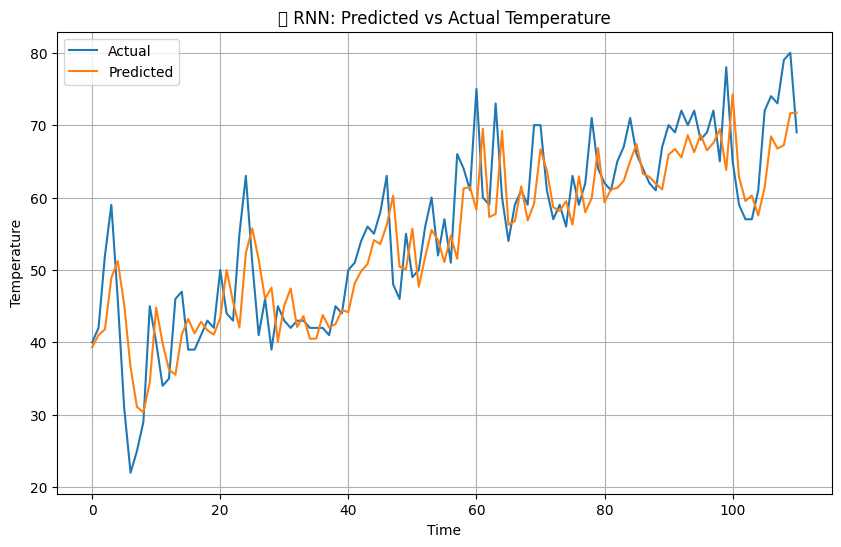

🔹 Mean Squared Error: 39.9804


In [24]:
plt.figure(figsize=(10, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title("🔹 RNN: Predicted vs Actual Temperature")
plt.xlabel("Time")
plt.ylabel("Temperature")
plt.legend()
plt.grid(True)
plt.show()


mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f"🔹 Mean Squared Error: {mse:.4f}")